In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Digits dataset
digits = datasets.load_digits()

# Extract features and labels
X = digits.data
y = digits.target 

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [2]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define distance function
def distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

# Define function to get k nearest neighbors
def k_nearest_neighbors(point, training_features, training_labels, k):
    neighbors = []
    for x, label in zip(training_features, training_labels):
        d = distance(point, x)
        neighbors.append((d, label))
    neighbors.sort(key=lambda tup: tup[0])
    return [label for _, label in neighbors[:k]]

# Predict function (majority voting)
def KNN_predict(test_features, training_features, training_labels, k):
    predictions = []
    for point in test_features:
        neighbors = k_nearest_neighbors(point, training_features, training_labels, k)
        predicted_label = max(set(neighbors), key=neighbors.count)
        predictions.append(predicted_label)
    return np.array(predictions)

In [ ]:

# Try different k values using cross-validation
from sklearn.model_selection import KFold

def knn_cross_validation(X, y, k_values, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    results = {}
    
    # Loop over different k values
    for k in k_values:
        accuracies = []
        for train_index, val_index in kf.split(X):
            X_train_cv, X_val_cv = X[train_index], X[val_index]
            y_train_cv, y_val_cv = y[train_index], y[val_index]
            y_pred_cv = KNN_predict(X_val_cv, X_train_cv, y_train_cv, k)
            accuracy = np.mean(y_pred_cv == y_val_cv)
            accuracies.append(accuracy)
        results[k] = np.mean(accuracies)
    return results

# Choose best k
k_values = range(1, 11)
cv_results = knn_cross_validation(X_train_scaled, y_train, k_values)
best_k = max(cv_results, key=cv_results.get)
print(f"Best k from cross-validation: {best_k}")


Best k from cross-validation: 7


In [ ]:

# Final model training and testing using best k
y_pred = KNN_predict(X_test_scaled, X_train_scaled, y_train, best_k)

# Compute accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9722


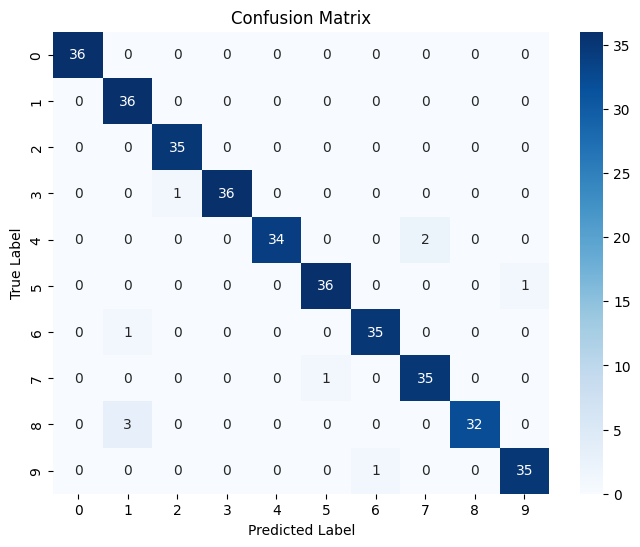

In [7]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [8]:

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        36
           2       0.97      1.00      0.99        35
           3       1.00      0.97      0.99        37
           4       1.00      0.94      0.97        36
           5       0.97      0.97      0.97        37
           6       0.97      0.97      0.97        36
           7       0.95      0.97      0.96        36
           8       1.00      0.91      0.96        35
           9       0.97      0.97      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

